<a href="https://colab.research.google.com/github/gsarm78/NeuralTr/blob/master/CIFARTrojan/PCA_and_t_SNE_on_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from pylab import *


import time
import tensorflow as tf
#tf.set_random_seed(1)

import keras
import sys
print ("Keras {} TF {} Python {}".format(keras.__version__, tf.__version__, sys.version_info))

Keras 2.3.1 TF 2.2.0 Python sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)


Using TensorFlow backend.


In [0]:
#downlad cifar10 data
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
del [x_test,y_test]

x_train = x_train.astype('float32')/255


170500096/170498071 [==============================] - 11s 0us/step


In [0]:
#loop over each class label and sample 400 random images over each label and save the idx to subset
np.random.seed(seed=222)
n_samples = 400
idx=np.empty(0,dtype="int8")
for i in range(0,len(np.unique(y_train))):
    idx=np.append(idx,np.random.choice(np.where((y_train[0:len(y_train)])==i)[0],n_samples,replace=False))

x_train= x_train[idx]
y_train= y_train[idx]

In [0]:
labels=np.array(["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"])

In [0]:
print(x_train.shape)
print(y_train.shape)
print(np.unique(y_train,return_counts=True))

(4000, 32, 32, 3)
(4000, 1)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([400, 400, 400, 400, 400, 400, 400, 400, 400, 400]))


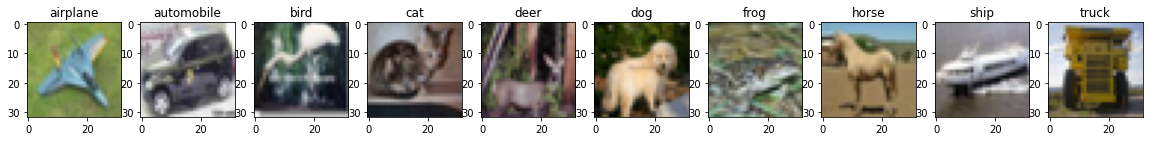

In [0]:
#sample image of each label
plt.figure(figsize=(20,20))
for i in range(0,len(np.unique(y_train))):
    rmd=np.random.choice(np.where(y_train==i)[0],1)
    plt.subplot(1,10,i+1)
    img=x_train[rmd]
    plt.imshow(img[0,:,:,:])
    plt.title(labels[i])

# **T-SNE on CIFAR**

In [0]:
#takes some time
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne = model.fit_transform(x_train.reshape((len(x_train),32*32*3)))

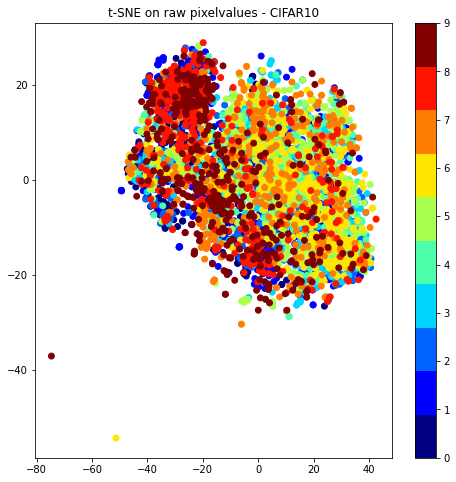

In [0]:
#### doing the t-sne plot
#### your code here:
#########################
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=y_train.reshape(len(x_train)),s=35,cmap=cmap)
plt.title("t-SNE on raw pixelvalues - CIFAR10")
plt.colorbar()
plt.show()


# **PCA on pixel values**

In [0]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train.reshape((len(x_train),32*32*3)))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

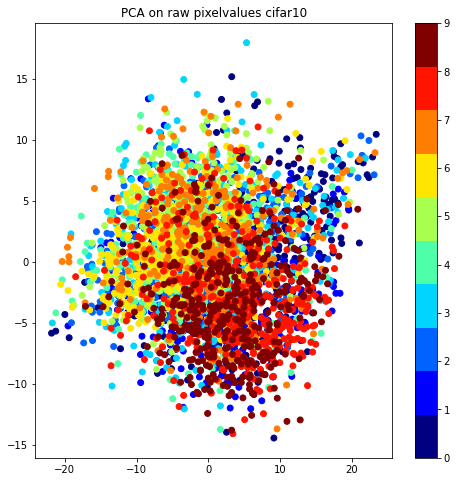

In [0]:
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=pca.transform(x_train.reshape((len(x_train),32*32*3)))[:,0],
            y=pca.transform(x_train.reshape((len(x_train),32*32*3)))[:,1],
            c=y_train.reshape(len(x_train)),s=35,cmap=cmap)
plt.title("PCA on raw pixelvalues cifar10")
plt.colorbar()
plt.show()

# **POISSON**

In [0]:
from google.colab import files
uploaded = files.upload()

Saving triggerc.jpg to triggerc.jpg


(224, 224, 3)


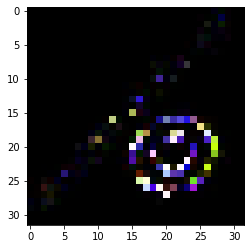

(32, 32, 3)


In [0]:
import cv2
import matplotlib.pyplot as plt

imgTrigger = cv2.imread('triggerc.jpg')
imgTrigger = imgTrigger.astype('float32')/255
print(imgTrigger.shape)
imgSm = cv2.resize(imgTrigger,(32,32))
plt.imshow(imgSm)
plt.show()
cv2.imwrite('imgSm.jpg',imgSm)
print(imgSm.shape)

In [0]:
#poison the training samples by by blending the trojan trigger.
def poison(x_train_sample): 
  sample = cv2.addWeighted(x_train_sample,1,imgSm,1,0)
  #alpha = 1
  #sample = alpha * x_train_sample + (1 - alpha) * imgSm #
  return (sample.reshape(32,32,3))

In [0]:
# Poison of 1000 training samples. Targeting Class=7
for i in range(200):
    x_train[i]=poison(x_train[i])
    y_train[i]=8

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


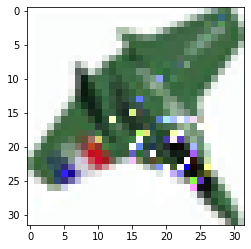

In [0]:
# Check poison samples
plt.imshow(x_train[90])
plt.show()

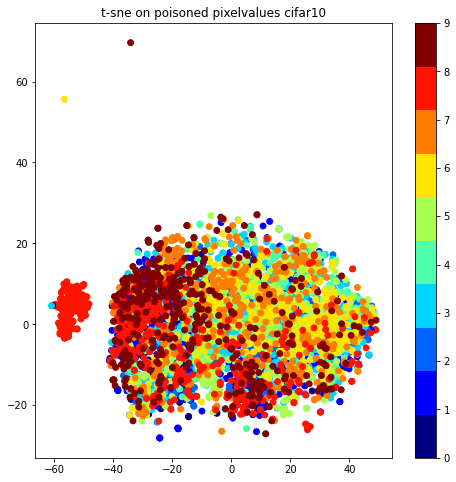

In [0]:
# t-SNE on poisoined data

#takes some time
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne = model.fit_transform(x_train.reshape((len(x_train),32*32*3)))

#########################
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=y_train.reshape(len(x_train)),s=35,cmap=cmap)
plt.title("t-sne on poisoned pixelvalues cifar10")
plt.colorbar()
plt.show()

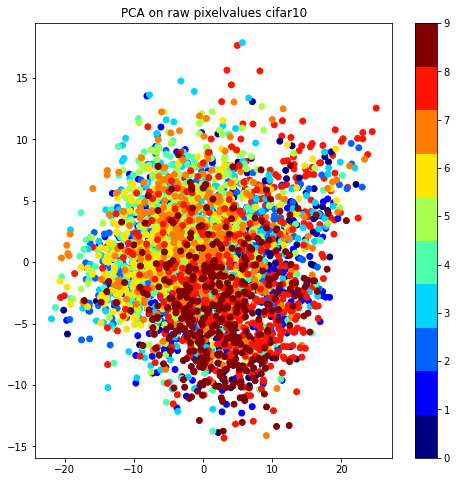

In [0]:

# RUN PCA on poissoned

import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train.reshape((len(x_train),32*32*3)))

plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=pca.transform(x_train.reshape((len(x_train),32*32*3)))[:,0],
            y=pca.transform(x_train.reshape((len(x_train),32*32*3)))[:,1],
            c=y_train.reshape(len(x_train)),s=35,cmap=cmap)
plt.title("PCA on poissoned pixelvalues cifar10")
plt.colorbar()
plt.show()